# Graph Test

In [1]:
import pandas as pd
import re
import numpy as np
import MySQLdb as mdb
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
% matplotlib inline

In [2]:
#list of genres, not actually used yet
genres = ['alternative', 'classic-rock', 'country', 'electronic', 'hip-hop', 'indie', 'blues', 'classical',
          'folk', 'hard-rock', 'jazz', 'latin', 'punk', 'rap', 'reggae', 'soul', 'techno']

In [3]:
#Seatgeek artists + genre 

con = mdb.connect(host = 'localhost', 
                  user = 'root',
                  database = 'Project',
                  passwd = '<password>', 
                  charset='utf8', use_unicode=True)
    
query_template = '''select *
                    from Project.seatgeek_artists a
                    join Project.seatgeek_concerts c on a.artist = c.artist
                    '''
cur = con.cursor(mdb.cursors.DictCursor)
cur.execute(query_template, )
data = cur.fetchall()
cur.close()
con.close()
seatgeek_joined = pd.DataFrame( list(data) )

# A) Price Analysis

## A.1) Cleaning

In [4]:
def belowIQR(dataframe, columnname):
    Q3 = float(np.percentile(dataframe[columnname], 75))
    Q1 = float(np.percentile(dataframe[columnname], 25))
    IQR = Q3 - Q1
    belowIQR = Q1 - 1.5*IQR
    return belowIQR

def aboveIQR(dataframe, columnname):
    Q3 = float(np.percentile(dataframe[columnname], 75))
    Q1 = float(np.percentile(dataframe[columnname], 25))
    IQR = Q3 - Q1
    aboveIQR = Q3 + 1.5*IQR
    return aboveIQR

def price_clean(dataframe, columnname):
    dataframe = dataframe[dataframe[columnname] >= 0]
    dataframe = dataframe.loc[(dataframe[columnname] < aboveIQR(dataframe, columnname)) 
                  & (dataframe[columnname] > belowIQR(dataframe, columnname))]
    return dataframe
    
def state_symbol(address):
    regex = re.compile('[A-Z][A-Z]')
    matches = regex.finditer(str(address))
    for match in matches:
        return match.group(0)

In [5]:
#Creating dataframe for Seatgeek(State) Price Analysis

seatgeek_cleaned = seatgeek_joined #remove NaNs
seatgeek_cleaned = seatgeek_cleaned.dropna()
seatgeek_cleaned['state'] = seatgeek_cleaned['address'].apply(lambda x: state_symbol(x))
seatgeek_cleaned['popularity'] = seatgeek_cleaned.popularity.astype(float) #Change popularity to float
seatgeek_cleaned = price_clean(seatgeek_cleaned, 'average_price')
seatgeek_cleaned = price_clean(seatgeek_cleaned, 'highest_price')
seatgeek_cleaned = price_clean(seatgeek_cleaned, 'lowest_price')

len(seatgeek_cleaned)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1249

In [35]:
seatgeek_cleaned.head(3)

,address,artist,average_price,c.artist,concert_date,genres,good_deals,highest_price,latitude,longitude,lowest_price,popularity,update_time,venue,state
4,"1 Center Street, Newark, NJ 07102",112,341.0,112,2017-12-08,soul/rnb/rap/,68.0,588.0,41,-74,68.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ
6,"1 Center Street, Newark, NJ 07102",112,264.0,112,2018-01-21,soul/rnb/rap/,66.0,944.0,33,-97,66.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ
8,"1 Center Street, Newark, NJ 07102",112,201.0,112,2018-02-25,soul/rnb/rap/,115.0,511.0,38,-122,115.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ


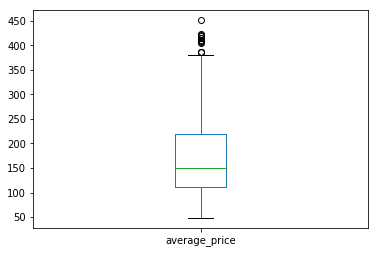

In [8]:
#Average price
#style.use('fivethirtyeight')
seatgeek_cleaned['average_price'].plot(kind='box')

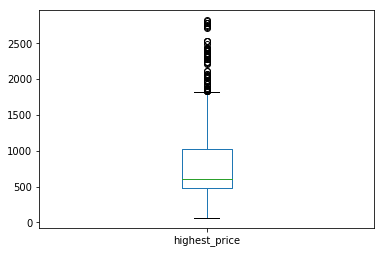

In [9]:
#Highest price
seatgeek_cleaned['highest_price'].plot(kind='box')

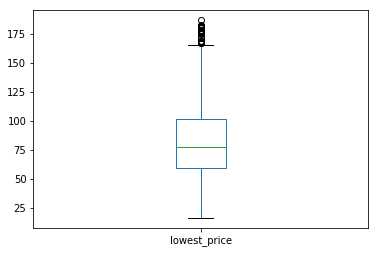

In [10]:
#Lowest price
seatgeek_cleaned['lowest_price'].plot(kind='box')

## A.1) State + Price

In [64]:
seatgeek_cleaned

,address,artist,average_price,c.artist,concert_date,genres,good_deals,highest_price,latitude,longitude,lowest_price,popularity,update_time,venue,state
4,"1 Center Street, Newark, NJ 07102",112,341.0,112,2017-12-08,soul/rnb/rap/,68.0,588.0,41,-74,68.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ
6,"1 Center Street, Newark, NJ 07102",112,264.0,112,2018-01-21,soul/rnb/rap/,66.0,944.0,33,-97,66.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ
8,"1 Center Street, Newark, NJ 07102",112,201.0,112,2018-02-25,soul/rnb/rap/,115.0,511.0,38,-122,115.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ
9,"1 Center Street, Newark, NJ 07102",112,148.0,112,2018-03-17,soul/rnb/rap/,147.0,588.0,36,-79,86.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ
12,"1 Center Street, Newark, NJ 07102",112,184.0,112,2018-04-22,soul/rnb/rap/,78.0,749.0,30,-96,78.0,0.52,2017-11-27 00:56:59,new-jersey-performing-arts-center,NJ
23,"611 S. 4th Street, Louisville, KY 40202",21-savage,147.0,21-savage,2017-12-15,hip-hop/rap/,60.0,1979.0,41,-74,60.0,0.47,2017-11-27 04:00:07,mercury-ballroom,KY
27,"Willy-Brandt-Platz 3, Cologne, Germany",2cellos,92.0,2cellos,2018-01-17,classical/,78.0,305.0,30,-95,78.0,0.58,2017-11-27 00:57:00,lanxess-arena,None
28,"Willy-Brandt-Platz 3, Cologne, Germany",2cellos,180.0,2cellos,2018-01-19,classical/,26.0,478.0,30,-98,26.0,0.58,2017-11-27 00:57:00,lanxess-arena,None
29,"Willy-Brandt-Platz 3, Cologne, Germany",2cellos,95.0,2cellos,2018-01-20,classical/,47.0,562.0,33,-97,47.0,0.58,2017-11-27 00:57:00,lanxess-arena,None
30,"Willy-Brandt-Platz 3, Cologne, Germany",2cellos,111.0,2cellos,2018-01-21,classical/,85.0,426.0,36,-96,85.0,0.58,2017-11-27 00:57:00,lanxess-arena,None


In [24]:
#total_pricing = seatgeek_cleaned.groupby('concert_date').mean()
#total_pricing['average_price'] = np.log(total_pricing['average_price'])
#total_pricing.head(3)

,average_price,good_deals,highest_price,latitude,longitude,lowest_price,popularity
concert_date,,,,,,,
2017-11-27,118.333333,61.000000,380.000000,38.666667,-76.666667,56.333333,0.623333
2017-11-28,129.666667,109.333333,164.666667,41.000000,-96.666667,109.333333,0.543333
2017-11-29,130.142857,72.809524,666.666667,38.333333,-93.857143,65.761905,0.576190


## Price

In [60]:
seatgeek_cleaned.head(3)

,address,artist,average_price,c.artist,concert_date,genres,good_deals,highest_price,latitude,longitude,lowest_price,popularity,update_time,venue,state
392,"6 Crannell Street, Poughkeepsie, NY 12601",arkells,108.0,arkells,2017-12-02,pop/rock/alternative/,48.0,273.0,28,-82,48.0,0.48,2017-11-29 23:30:03,the-chance-theater,NY
795,"17 Irving Place, New York, NY 10003",brett-eldredge,59.0,brett-eldredge,2018-02-10,country/folk/,35.0,732.0,29,-98,35.0,0.66,2017-11-27 06:15:28,irving-plaza,NY
796,"17 Irving Place, New York, NY 10003",brett-eldredge,222.0,brett-eldredge,2018-02-16,country/folk/,72.0,2323.0,36,-96,72.0,0.66,2017-11-27 06:15:28,irving-plaza,NY


In [28]:
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m
df.head(3)

,g,x
0,A,64.038123
1,B,66.147050
2,C,66.370011


In [175]:
nytest = seatgeek_cleaned[seatgeek_cleaned['state'] == 'KY']
nytest_avg = nytest['average_price']
nytest_high = nytest['highest_price']
nytest_low = nytest['lowest_price']

total_avg = seatgeek_cleaned['average_price']
nytest.head(3)

,address,artist,average_price,c.artist,concert_date,genres,good_deals,highest_price,latitude,longitude,lowest_price,popularity,update_time,venue,state
23,"611 S. 4th Street, Louisville, KY 40202",21-savage,147.0,21-savage,2017-12-15,hip-hop/rap/,60.0,1979.0,41,-74,60.0,0.47,2017-11-27 04:00:07,mercury-ballroom,KY
164,"430 W Vine St, Lexington, KY 40507",alan-jackson,177.0,alan-jackson,2018-01-21,country/folk/,71.0,500.0,35,-92,71.0,0.57,2017-11-27 04:33:08,rupp-arena,KY
165,"430 W Vine St, Lexington, KY 40507",alan-jackson,170.0,alan-jackson,2018-02-09,country/folk/,76.0,827.0,39,-94,76.0,0.57,2017-11-27 04:33:08,rupp-arena,KY


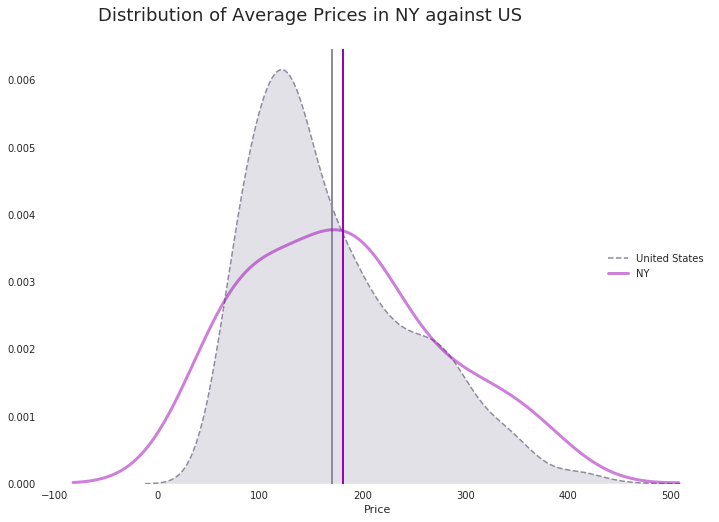

In [176]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
fig, ax = plt.subplots(figsize=(12, 8))

totaldist = sns.kdeplot(total_avg, shade=True, color="#8c8ba0", linewidth = 1.5, linestyle = "--", label = "United States")
totalline = plt.axvline(total_avg.mean(), color='#8c8ba0', linestyle= "-", linewidth=2) #BLUE
statedist = sns.kdeplot(nytest_avg, shade=False, color="#9c00b7", alpha = 0.5, linewidth = 3, label = "{}".format("NY"))
stateline = plt.axvline(nytest_avg.mean(), color='#9c00b7', linestyle= "-", linewidth=2)

ax.set_title('Distribution of Average Prices in {} against US'.format('NY'), size = 18, x = 0.4, y = 1.05)
ax.set_xlabel('Price')
plt.legend(loc='center right')
#ax.text(200, 0.010,'US Mean Line',fontsize=10, color = 'black')
sns.despine(left=True, bottom=True, right=True)


#fig = heatmapplot.get_figure()
#fig.savefig("output.png")

# Heatmap

In [6]:
#Songkick dates
con = mdb.connect(host = 'localhost', 
                  user = 'root',
                  database = 'Project',
                  passwd = '<password>', 
                  charset='utf8', use_unicode=True)
    
query_template = '''select artist, concert_date, city
                    from Project.songkick
                    where concert_date > '2012-00-00'
                    '''
cur = con.cursor(mdb.cursors.DictCursor)
cur.execute(query_template, )
data = cur.fetchall()
cur.close()
con.close()
songkick_date = pd.DataFrame( list(data) )

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: Warning: (1292, "Incorrect datetime value: '2012-00-00' for column 'concert_date' at row 1")
  del sys.path[0]


In [7]:
songkick_date2 = songkick_date
songkick_date2['state'] = songkick_date2['city'].apply(lambda x: state_symbol(x))
songkick_date2.head(3)

,artist,city,concert_date,state
0,10-000-maniacs,"Cambridge, MA, US",2012-03-14,MA
1,10-000-maniacs,"Newton, NJ, US",2012-06-16,NJ
2,10-000-maniacs,"New York, NY, US",2012-07-08,NY


In [8]:
testNY = songkick_date2[songkick_date2['state'] == 'NY']

In [9]:
testNY['year'] = testNY['concert_date'].apply(lambda x: x.year)
testNY['month'] = testNY['concert_date'].apply(lambda x: x.strftime("%b"))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
testNY.head(3)

,artist,city,concert_date,state,year,month
2,10-000-maniacs,"New York, NY, US",2012-07-08,NY,2012,Jul
3,10-000-maniacs,"New York, NY, US",2012-07-09,NY,2012,Jul
19,10-000-maniacs,"Buffalo, NY, US",2013-06-22,NY,2013,Jun


In [27]:
pivot_dates = pd.pivot_table(testNY, 
                       values='artist', 
                       index=['month'], # rows
                       columns=['year'], # columns
                       aggfunc= 'count')

pivot_dates = pivot_dates.fillna(0)
pivot_dates.head()

DataError: No numeric types to aggregate

In [17]:
pivot_dates.dtypes

year
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

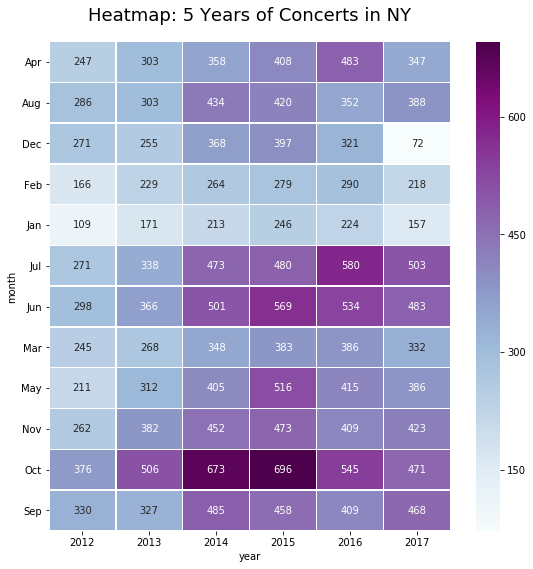

In [26]:
#sns.set()
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(9, 9))
heatmapplot = sns.heatmap(pivot_dates, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="BuPu")
plt.yticks(rotation=0)

ax.set_title('Heatmap: 5 Years of Concerts in {}'.format('NY'), size = 18, color = 'black', x = 0.50, y = 1.03)

fig = heatmapplot.get_figure()
fig.savefig("output.png", dpi=300)

## Top Artist in Location

In [253]:
#Songkick dates
con = mdb.connect(host = 'localhost', 
                  user = 'root',
                  database = 'Project',
                  passwd = '<password>', 
                  charset='utf8', use_unicode=True)
    
query_template = '''select a.artist, a.popularity, s.concert_date, s.city, s.role
                    from Project.seatgeek_artists a
                    join Project.songkick s on a.artist = s.artist
                    where s.city like '% NY,%' and concert_date > '2012-00-00'
                    order by popularity desc
                    '''
cur = con.cursor(mdb.cursors.DictCursor)
cur.execute(query_template, )
data = cur.fetchall()
cur.close()
con.close()
songkick_popular = pd.DataFrame(list(data))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: Warning: (1292, "Incorrect datetime value: '2012-00-00' for column 'concert_date' at row 1")
  from ipykernel import kernelapp as app


In [254]:
songkick_popular['popularity'] = songkick_popular.popularity.astype(float)
songkick_popular['artist'] = songkick_popular['artist'].apply(lambda x: str(x))
songkick_popular.head()

,artist,city,concert_date,popularity,role
0,taylor-swift,"Manhattan, NY, US",2012-12-07,0.86,headline
1,taylor-swift,"Manhattan, NY, US",2014-12-12,0.86,headline
2,taylor-swift,"New York, NY, US",2015-12-31,0.86,headline
3,foxes,"New York, NY, US",2012-07-11,0.84,headline
4,foxes,"Brooklyn, NY, US",2012-07-14,0.84,headline


In [255]:
#Popularity
popularity = songkick_popular[['artist','popularity']]
popularity = popularity.groupby('artist').mean()

#Number of concerts
num_concerts = songkick_popular[['artist', 'city']]
num_concerts = num_concerts.groupby('artist').count()

#Number of headlines
headlines = songkick_popular[['artist', 'role']]
headlines = headlines.groupby('artist')['role'].apply(lambda x: x[x.str.contains('headline')].count())

In [256]:
#Combine together
merged = pd.merge(num_concerts, popularity, left_index=True, right_index=True)
merged['headline'] = headlines
merged = merged.rename(columns={'city': 'concerts'})
merged = merged.reset_index()
merged = merged.sort_values(by='concerts', ascending=False)
merged = merged.head(50)

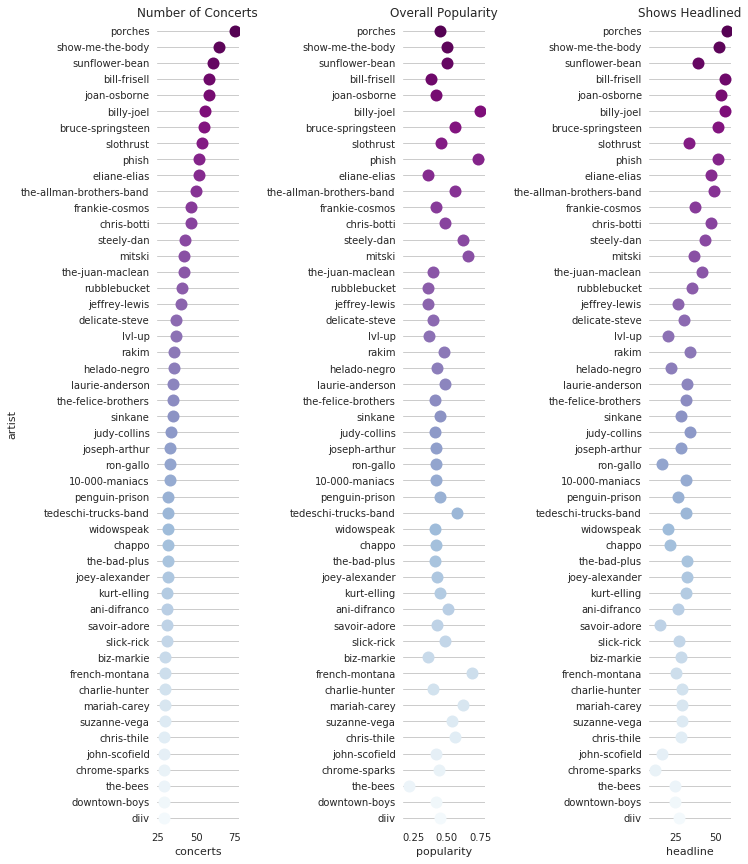

In [267]:
# Load the dataset
#crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(merged.sort_values("concerts", ascending=False), x_vars=merged.columns[1:4], 
                 y_vars= ["artist"], size=12, aspect=.25)



# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=12, orient="h",
      palette="BuPu_r", edgecolor="gray") #_r to reverse palette

# Use semantically meaningful titles for the columns
titles = ["Number of Concerts", "Overall Popularity", "Shows Headlined"]


for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

g.fig.subplots_adjust(hspace=0, wspace=2.0) #edit wspace to shorten gap between subplots
sns.despine(left=True, bottom=True)

fig = g.fig
fig.savefig("pairplot.png", dpi=200, bbox_inches="tight")